Import libraries and data

In [1]:
import rasterio
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, KFold
import joblib
import optuna
import matplotlib.pyplot as plt
import shap

# Load data from xls file
data = pd.read_excel("cal_val_SSC_Planetscope.xlsx")

# Separate features and target
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values


Building model and optimizing the hyperparameters 

In [ ]:
# # Define objective function for Optuna optimization
# def objective(trial):
#     # Set hyperparameters to optimize
#     hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (50,50), (100,50), (20,60,10), 
#                                                                           (5,10,20), (100, 5, 20), (10, 10), (10, 15), (20,30)
#                                                                          ,(25, 30), (40, 10, 20), (100, 50, 30), (200, 20, 10), 
#                                                                           (30, 20), (150, 150)])
#     activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'logistic'])
#     solver = trial.suggest_categorical('solver', ['lbfgs', 'sgd', 'adam'])
#     alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
#     learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'invscaling', 'adaptive'])
#     max_iter = trial.suggest_int('max_iter', 100, 1000)
#     batch_size = trial.suggest_int('batch_size', 32, 128)

#     # Initialize ANN model with hyperparameters
#     model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,
#                          activation=activation,
#                          solver=solver,
#                          alpha=alpha,
#                          learning_rate=learning_rate,
#                          max_iter=max_iter, batch_size=batch_size,
#                          random_state=42)

#     # Set kfold for cross-validation
#     kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#     # Calculate cross-validation score using R2 as evaluation metric
#     score = cross_val_score(model, X, y, cv=kfold, scoring='r2')

#     # Return mean of R2 scores as objective value
#     return score.mean()

# # Run Optuna optimization to find best hyperparameters
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=1000, show_progress_bar=True)

# # Print best hyperparameters found by Optuna
# print("Best hyperparameters: ", study.best_params)


Build final model using best hyperparameters

In [ ]:
# # Build final model using best hyperparameters
# best_hidden_layer_sizes = study.best_params['hidden_layer_sizes']
# best_activation = study.best_params['activation']
# best_solver = study.best_params['solver']
# best_alpha = study.best_params['alpha']
# best_learning_rate = study.best_params['learning_rate']
# best_max_iter = study.best_params['max_iter']
# best_batch_size=study.best_params["batch_size"]

# final_model = MLPRegressor(hidden_layer_sizes=best_hidden_layer_sizes,
#                            activation=best_activation,
#                            solver=best_solver,
#                            alpha=best_alpha,
#                            learning_rate=best_learning_rate,
#                            max_iter=best_max_iter, batch_size=best_batch_size,
#                            random_state=42)

# # Evaluate final model using k-fold cross-validation and R2 score
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# cv_scores = cross_val_score(final_model, X, y, cv=kfold, scoring='r2')

# print("R2 score of final model based on k-fold cross-validation: ", cv_scores.mean())

save the final trained model 

In [ ]:
# #fit the model
# final_model.fit (X,y)
# #save the final trained model 
# joblib.dump(final_model, 'Final model_SSC_planet_kfold.pkl')

Load the saved model

In [3]:
# Load the saved model from a file
final_model = joblib.load('Final model_SSC_planet_kfold.pkl')

Feature imprtance by SHAP

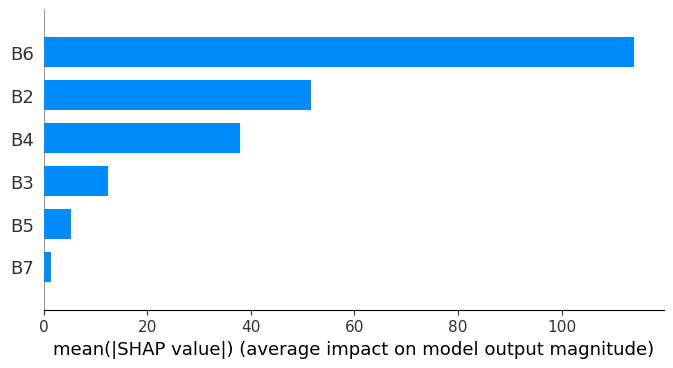

In [9]:
predict_function = lambda X: final_model.predict(X)

# Create an explainer using the Shapley sampling method
explainer = shap.Explainer(predict_function, X)

# Calculate Shapley values for every feature
shap_values = explainer(X)

# Plot summary plot for the features
shap.summary_plot(shap_values,X, plot_type="bar", feature_names=["B2", "B3", "B4", "B5", "B6", "B7"], show=False)
    
plt.savefig ("D:/Mip and TSS Project/Graphs_article_2/summary plot SHAP/SSC_PS_summary_plot.png", bbox_inches='tight', dpi=600)

# Show the plot
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


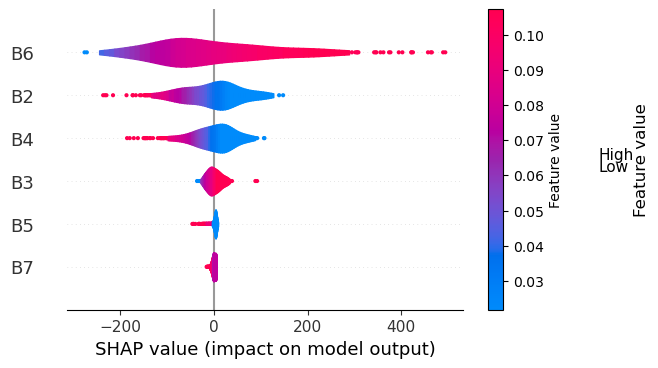

In [10]:
# Plot summary plot for the features
shap.summary_plot(shap_values,X, plot_type="violin", feature_names=["B2", "B3", "B4", "B5", "B6", "B7"], 
                  color=plt.cm.Blues, show=False)  # Provide appropriate feature names

plt.colorbar(label='Feature value')  # Add color scale bar with label
plt.savefig ("D:/Mip and TSS Project/Graphs_article_2/summary plot SHAP/SSC_PS_summary_plot_violin.png", bbox_inches='tight', dpi=600)

# Show the plot
plt.show()

Vizualize the scoring for the Kfolds 

In [ ]:
# from yellowbrick.model_selection import cv_scores
# kfold = KFold(n_splits=5, shuffle=True)
# visulazizer = cv_scores (final_model, X, y, cv=kfold, scoring="r2")

Split the data into training and testing and calcuate metrics for testing dataset 

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score, mean_squared_error
# X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2)
# final_model_2=final_model.fit(X_train, y_train)
# y_pred_test=final_model_2.predict (X_test)
# r2_test=r2_score (y_pred_test, y_test)
# rmse_test=mean_squared_error (y_pred_test, y_test, squared=False)
# print (r2_test, rmse_test)


metrics for training dataset

In [ ]:
# y_pred_train=final_model_2.predict (X_train)
# r2_train=r2_score (y_pred_train, y_train)
# rmse_train=mean_squared_error (y_pred_train, y_train, squared=False)
# print (r2_train, rmse_test)

In [ ]:
# x_axes = range(len(y_pred_test))
# plt.scatter(x_axes, y_test, s=5, color="blue", label="original")
# plt.plot(x_axes, y_pred_test, lw=0.8, color="red", label="predicted")
# plt.legend()
# plt.show()


In [14]:
data_1=rasterio.open ("D:/Mip and TSS Project/spatiotemporal test/SSC_longitudnal/planetscope/37 TiszaroffTiszasuly/subset_20220630_091254_30_248f.tif")
data_2=data_1.read ()
data_3=np.swapaxes (data_2, 0, 2)
data_3=np.swapaxes (data_3, 0, 1)
data_3 = data_3.reshape (data_3.shape [0]*data_3.shape [1], data_3.shape [2])
prediction = final_model.predict (data_3)
prediction=prediction.reshape (1,data_2.shape [1] , data_2.shape [2])
prediction=prediction.astype (np.int32)
with rasterio.open ("D:/Mip and TSS Project/spatiotemporal test/SSC_longitudnal/planetscope/37 TiszaroffTiszasuly/SSC.tif", 'w',
                    driver="GTiff", 
                   width=data_2.shape [2], 
                   height=data_2.shape [1],
                   count=1, 
                   crs=data_1.crs, 
                   transform=data_1.transform, 
                   dtype=rasterio.int32) as dst:
    dst.write (prediction)